In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

In [5]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    return (x_train, y_train), (x_test, y_test)

In [6]:
def load_cifar10():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    return (x_train, y_train), (x_test, y_test)

In [7]:
def create_cnn_model(learning_rate):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Pour MNIST
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [8]:
# Définir les hyperparamètres à tester
learning_rates = [1e-6, 1e-4, 1e-2, 1e-1]
batch_sizes = [32, 64, 128, 256]

# Créer une grille de paramètres
param_grid = ParameterGrid({'learning_rate': learning_rates, 'batch_size': batch_sizes})

In [9]:
def run_experiments(x_train, y_train, x_test, y_test):
    results = []

    for params in param_grid:
        model = create_cnn_model(params['learning_rate'])
        history = model.fit(x_train, y_train,
                            epochs=5,
                            batch_size=params['batch_size'],
                            validation_split=0.2,
                            verbose=0)

        test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

        results.append({
            'learning_rate': params['learning_rate'],
            'batch_size': params['batch_size'],
            'test_loss': test_loss,
            'test_accuracy': test_accuracy,
            'history': history.history
        })

    return results

In [10]:
def analyze_results(results):
    df_results = pd.DataFrame(results)
    
    plt.figure(figsize=(12, 6))
    for lr in learning_rates:
        subset = df_results[df_results['learning_rate'] == lr]
        plt.plot(subset['batch_size'], subset['test_accuracy'], marker='o', label=f'lr={lr}')
    
    plt.xlabel('Taille des Batchs')
    plt.ylabel('Précision sur le Test Set')
    plt.title('Impact du Taux d\'Apprentissage et de la Taille des Batchs sur la Précision')
    plt.legend()
    plt.grid()
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 24s 2us/step


d:\ISE 3 2024-2025\DSM ISE3 2025\ML et optimization\Projet\mon_projet_MLO\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


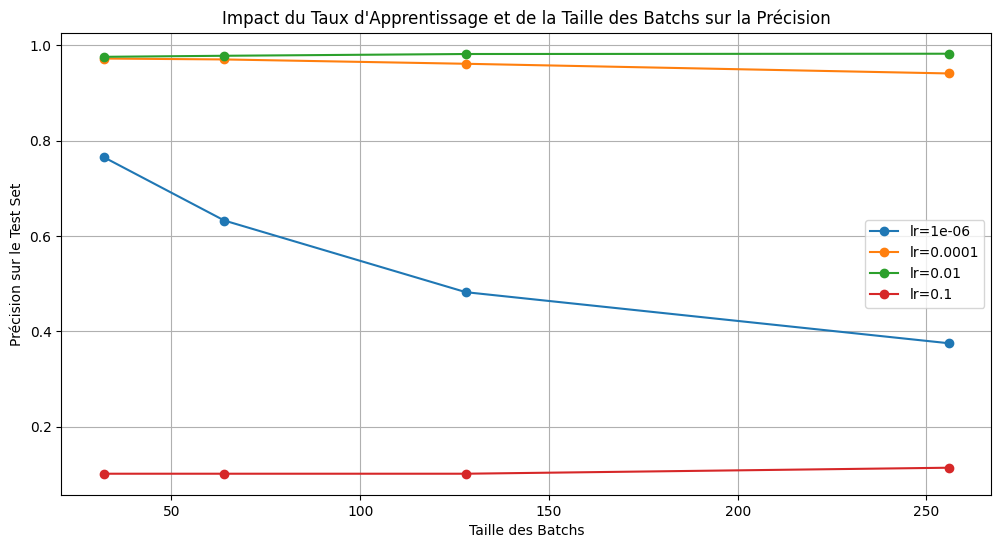

In [11]:
if __name__ == "__main__":
    # Choisir le dataset
    (x_train, y_train), (x_test, y_test) = load_mnist()  # ou load_cifar10()

    results = run_experiments(x_train, y_train, x_test, y_test)
    analyze_results(results)